# Energy System Modelling - Tutorial I.1

Karlsruhe Institute of Technology, Institute for Automation and Applied Informatics
***

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline

***
# Introductory Comments

## Getting Help

Executing cells with Shift-Enter and with `h` there is help.

Help is available with `.<TAB>` or `load.sort_values()` <- cursor between brackets, `Shift-<TAB>`

## Using one-dimensional arrays (Numpy and Pandas)

**Numpy**

In [2]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [3]:
a[1:3]

array([1, 2])

**Pandas**

In [4]:
s = pd.Series(np.random.random(3), index=['foo', 'bar', 'baz'])
s

foo    0.332525
bar    0.082034
baz    0.630665
dtype: float64

In [5]:
s["foo":"bar"]

foo    0.332525
bar    0.082034
dtype: float64

## Using two-dimensional arrays (Numpy and Pandas)

**Numpy** 

In [6]:
np.random.random((3,5))

array([[0.97580444, 0.06870381, 0.39786507, 0.88384621, 0.29709974],
       [0.38801297, 0.12546012, 0.94659786, 0.56357202, 0.81102652],
       [0.81165347, 0.27672157, 0.09248334, 0.54953101, 0.58551523]])

**Pandas**

In [7]:
s = pd.DataFrame(np.random.random((3,5)),
                 index=['foo', 'bar', 'baz'],
                 columns=['colA', 'colB', 'colC', 'colD', 'colE'])
s

,colA,colB,colC,colD,colE
foo,0.228604,0.296428,0.535976,0.501424,0.077790
bar,0.998267,0.673991,0.400075,0.156973,0.633011
baz,0.975072,0.612483,0.154791,0.422823,0.171161


In [8]:
s.mean()

colA    0.733981
colB    0.527634
colC    0.363614
colD    0.360407
colE    0.293987
dtype: float64

In [9]:
s.mean(axis=1)

foo    0.328044
bar    0.572463
baz    0.467266
dtype: float64

***
# Problem I.1

The following data are made available to you on the repository in the `./data` directory:

`de_data.csv`, `gb_data.csv`, `eu_data.csv`
and alternatively
`wind.csv`, `solar.csv`, `load.csv`

They describe (quasi-real) time series for wind power generation $W(t)$, solar power generation $S(t)$ and load $L(t)$ in Great Britain (GB), Germany (DE) and Europe (EU). The time step is 1 h and the time series are several years long.

> Remark: In this example notebook, we only look at Germany and the EU, Great Britain works in exactly the same way.

***
**Read Data**

In [10]:
de = pd.read_csv('data/de_data.csv', parse_dates=True, index_col=0)
eu = pd.read_csv('data/eu_data.csv', parse_dates=True, index_col=0)
gb = pd.read_csv('data/gb_data.csv', parse_dates=True, index_col=0)

In [11]:
wind = pd.read_csv('data/wind.csv', parse_dates=True, index_col=0)
solar = pd.read_csv('data/solar.csv', parse_dates=True, index_col=0)
load = pd.read_csv('data/load.csv', parse_dates=True, index_col=0)

Extra: Show the first and last 5 lines (header) of the German data:

In [12]:
de.head()

,wind,solar,load
time,,,
2011-01-01 00:00:00,0.535144,0.0,46209.0
2011-01-01 01:00:00,0.580456,0.0,44236.0
2011-01-01 02:00:00,0.603605,0.0,42502.0
2011-01-01 03:00:00,0.614114,0.0,41479.0
2011-01-01 04:00:00,0.627257,0.0,39923.0


In [13]:
de.tail()

,wind,solar,load
time,,,
2014-12-31 19:00:00,0.191347,0.0,50365.0
2014-12-31 20:00:00,0.220209,0.0,48725.0
2014-12-31 21:00:00,0.247598,0.0,49074.0
2014-12-31 22:00:00,0.273812,0.0,47667.0
2014-12-31 23:00:00,0.295076,0.0,47667.0


Extra: Check that wind, solar and load files are just differently organized datasets and it's the same data:

In [14]:
(wind['DE'] == de['wind']).all()

True

Extra: How many years does the dataset comprise?

In [15]:
de.index

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               ...
               '2014-12-31 14:00:00', '2014-12-31 15:00:00',
               '2014-12-31 16:00:00', '2014-12-31 17:00:00',
               '2014-12-31 18:00:00', '2014-12-31 19:00:00',
               '2014-12-31 20:00:00', '2014-12-31 21:00:00',
               '2014-12-31 22:00:00', '2014-12-31 23:00:00'],
              dtype='datetime64[ns]', name='time', length=35064, freq=None)

Data set includes four years ranging from `2011-01-01` until `2014-12-31`.

***
**(a) Check that the wind and solar time series are normalized to ’per-unit of installed capacity’,
and that the load time series is normalized to MW.**

In [16]:
wind.max()

DE    0.994588
GB    0.999998
EU    0.719222
dtype: float64

***
**(b) For all three regions, calculate the maximum, mean, and variance of the time series.**

In [17]:
de.describe()

,wind,solar,load
count,35064.000000,35064.000000,35064.000000
mean,0.265785,0.149262,54877.199806
std,0.239194,0.221564,10354.693128
min,0.000577,0.000000,29201.000000
25%,0.078827,0.000000,46321.750000
50%,0.181354,0.000000,54594.000000
75%,0.394514,0.268505,63953.250000
max,0.994588,0.913781,79286.000000


In [18]:
de.var()

wind     5.721393e-02
solar    4.909081e-02
load     1.072197e+08
dtype: float64

There are 35064 time slots: 8760h*4 + 24 (2012 was a leap year!)

The wind and solar time series have a maximum slightly below 1, thus we can conclude that per-unit values are given.

The maximum may be below 1 if normalisation was performed on a longer time period.

The load time series has a unit of MW, with the mean of 55 GW, which is typical for Germany.

Max, mean and variance as shown above in per-unit/MW.

***
**(c) For all three regions, plot the time series $W (t)$, $S(t)$, $L(t)$ for a winter month (January) and a summer month (July).**

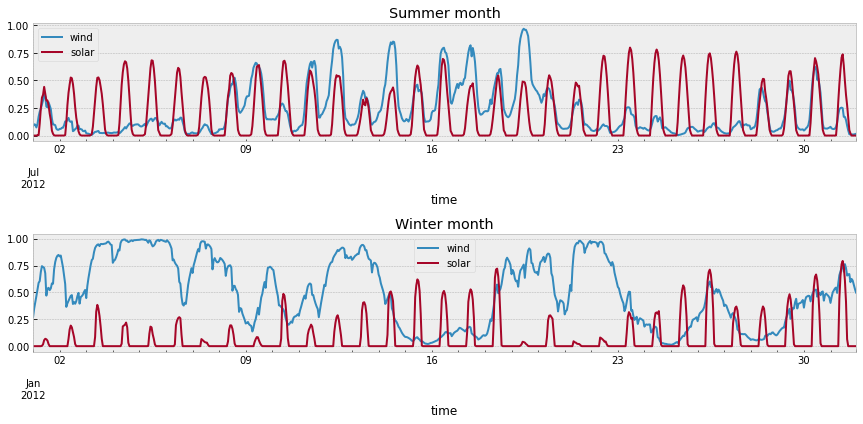

In [19]:
fig, axes = plt.subplots(2, 1, figsize=(12, 6))
de.loc["2012-07", ['wind', 'solar']].plot(ax=axes[0])
axes[0].set_title("Summer month")
de.loc["2012-01", ['wind', 'solar']].plot(ax=axes[1])
axes[1].set_title("Winter month")
fig.tight_layout()

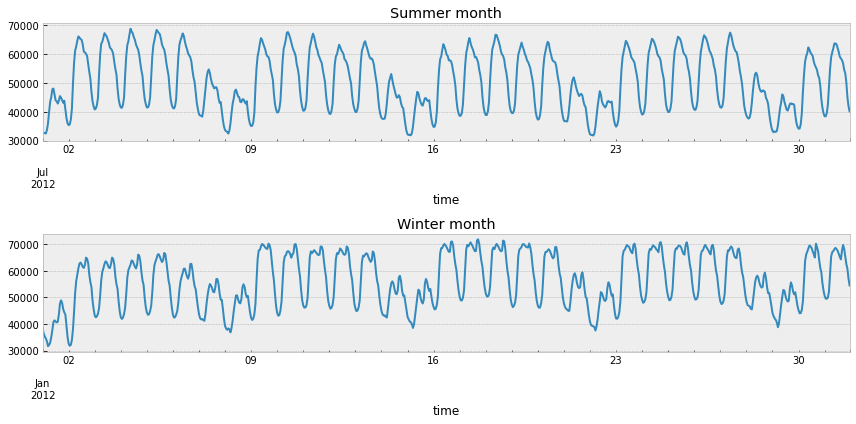

In [20]:
fig, axes = plt.subplots(2, 1, figsize=(12, 6))
de.loc["2012-07", 'load'].plot(ax=axes[0])
axes[0].set_title("Summer month")
de.loc["2012-01", 'load'].plot(ax=axes[1])
axes[1].set_title("Winter month")
fig.tight_layout()

Let's also compare the wind between the different regions

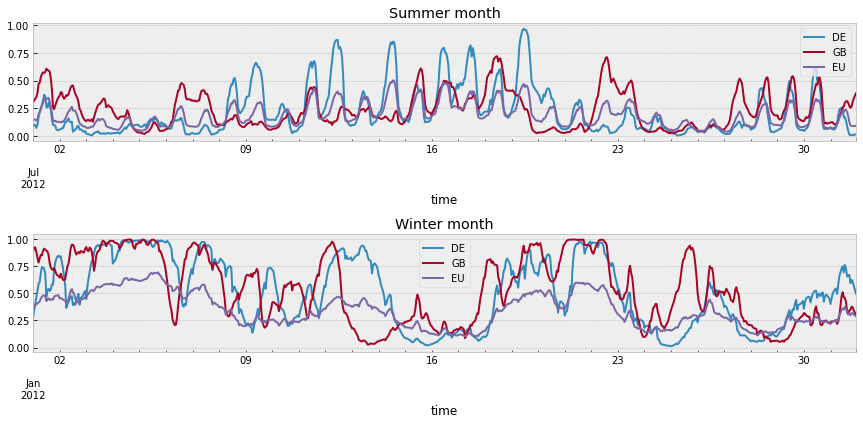

In [21]:
fig, axes = plt.subplots(2, 1, figsize=(12, 6))
wind.loc["2012-7", ['DE', 'GB', 'EU']].plot(ax=axes[0])
axes[0].set_title("Summer month")
wind.loc["2012-1", ['DE', 'GB', 'EU']].plot(ax=axes[1])
axes[1].set_title("Winter month")
fig.tight_layout()

***
**(d) Resample the time series to daily, weekly and monthly data points and visualise them in plots. Can you identify some recurring patterns?**

> **Hint:** Use the function [`.resample`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html)  with `.mean`.

Wind:

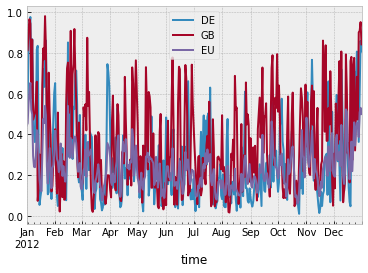

In [22]:
wind.loc["2012",['DE','GB','EU']].resample('D').mean().plot()

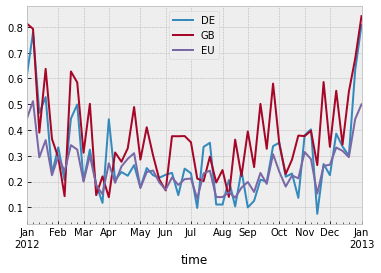

In [23]:
wind.loc["2012",['DE','GB','EU']].resample('W').mean().plot()

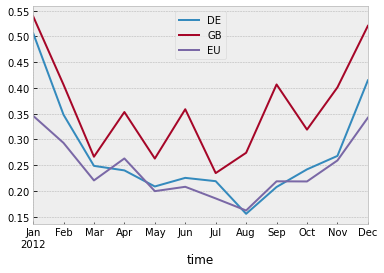

In [24]:
wind.loc["2012",['DE','GB','EU']].resample('M').mean().plot()

Solar:

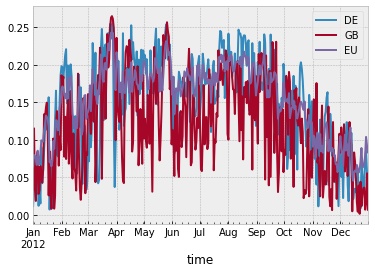

In [25]:
solar.loc["2012",['DE','GB','EU']].resample('D').mean().plot()

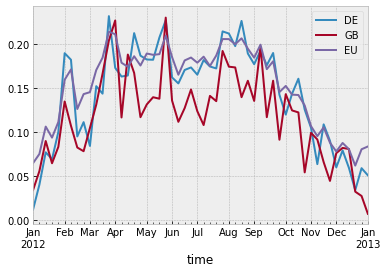

In [26]:
solar.loc["2012",['DE','GB','EU']].resample('W').mean().plot()

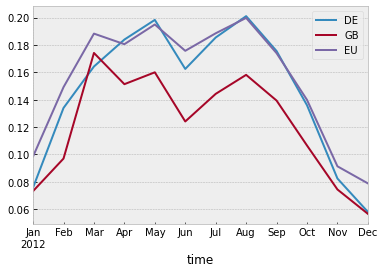

In [27]:
solar.loc["2012",['DE','GB','EU']].resample('M').mean().plot()

Load:

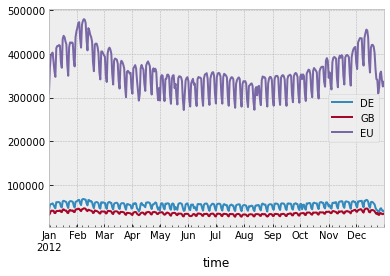

In [28]:
load.loc["2012",['DE','GB','EU']].resample('D').mean().plot()

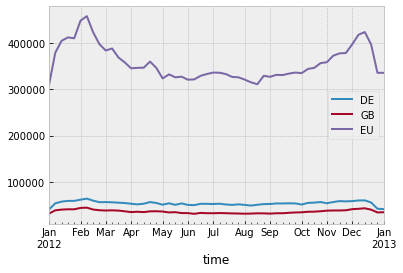

In [29]:
load.loc["2012",['DE','GB','EU']].resample('W').mean().plot()

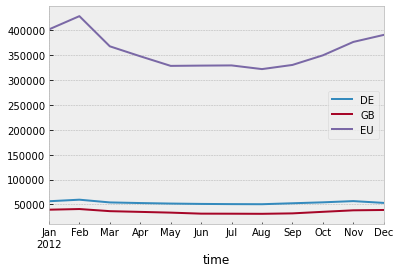

In [30]:
load.loc["2012",['DE','GB','EU']].resample('M').mean().plot()

***
**(e) For all three regions, plot the duration curve for $W(t)$, $S(t)$, $L(t)$.** 
> **Hint:** You might want to make use of the functions [`.sort_values`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html) and [`.reset_index`](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.reset_index.html)

> **Tip:** Go through the line `de['wind'].sort_values(ascending=False).reset_index(drop=True).plot()` dot by dot and note what happens to the output.

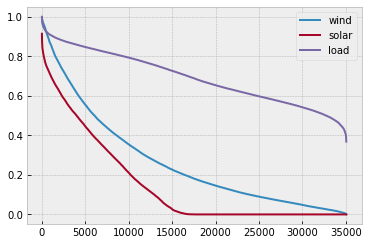

In [31]:
de['wind'].sort_values(ascending=False).reset_index(drop=True).plot()
de['solar'].sort_values(ascending=False).reset_index(drop=True).plot()
l = de['load']
l /= l.max() # normalize load
l.sort_values(ascending=False).reset_index(drop=True).plot()
plt.legend()

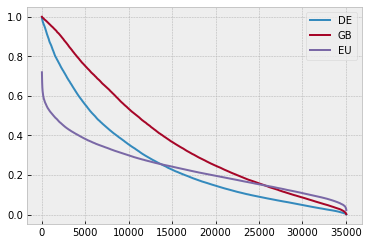

In [32]:
wind['DE'].sort_values(ascending=False).reset_index(drop=True).plot()
wind['GB'].sort_values(ascending=False).reset_index(drop=True).plot()
wind['EU'].sort_values(ascending=False).reset_index(drop=True).plot()
plt.legend()

***
**(f) For all three regions, plot the probability density function of $W(t)$, $S(t)$, $L(t)$.**

There are two different methods:
1. [Histograms](https://en.wikipedia.org/wiki/Histogram) and 
2. [Kernel density estimation (KDE)](https://en.wikipedia.org/wiki/Kernel_density_estimation).

This [image](https://en.wikipedia.org/wiki/Kernel_density_estimation#/media/File:Comparison_of_1D_histogram_and_KDE.png) on the KDE page provides a good summary of the differences. You can do both with `pandas`!

First, let's look at the wind data:

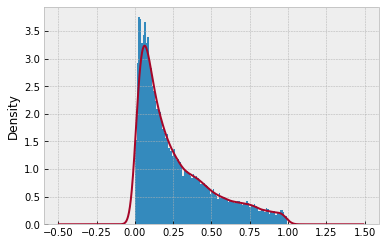

In [33]:
# 1)
de['wind'].plot.hist(bins=100, density=True)

# 2)
de['wind'].plot.density()

Now, let's look at the solar data:

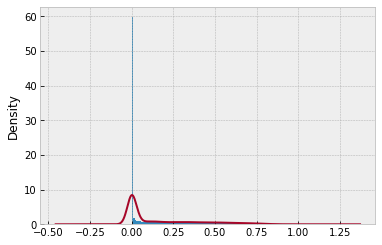

In [34]:
# 1)
de['solar'].plot.hist(bins=100, density=True)

# 2)
de['solar'].plot.density()

Somewhat hard to see (It's dark quite a long time!). Let's look at this in detail by limiting the y-axis shown to (0,2):

(0.0, 2.0)

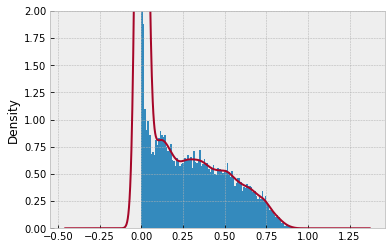

In [35]:
# 1)
de['solar'].plot.hist(bins=100, density=True)

# 2)
ax=de['solar'].plot.density()

ax.set_ylim(ymax=2)

Finally, let's look at the load profile:

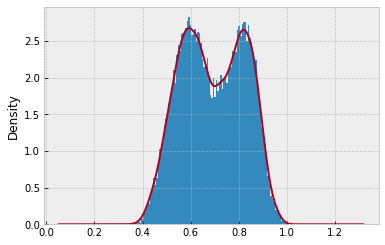

In [36]:
# 1)
de['load'].plot.hist(bins=100, density=True)

# 2)
de['load'].plot.density()

***
**(g) Apply a [(Fast) Fourier Transform](https://en.wikipedia.org/wiki/Fast_Fourier_transform) to the the three time series $X \in W(t), S(t), L(t)$:**

$$\tilde{X}(\omega) = \int_0^T X(t) \;e^{i\omega t} \;\mathrm{d}t.$$

**For all three regions, plot the energy spectrum $\|\tilde{X}(\omega)\|^2$ as a function of $\omega$. Discuss the relationship of these results with the findings obtained in (b)-(f).**

> **Remark:** Use the function [`numpy.fft.rfft`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.rfft.html) and make sure you subtract the mean since the Fourier transformation requires the time series to have a zero mean to decompose it into its frequencies.

> **Remark:** To determine the frequencies [`numpy.fft.rfffreq`](https://docs.scipy.org/doc/numpy-1.12.0/reference/generated/numpy.fft.rfftfreq.html) is used, the argument `d` indicates the distance between two data points, `1h` hour, which we specify as $\frac{1}{8760} a$, so that the frequencies come out in the unit $\frac{1}{a}$.

Text(0.5, 0, '1 / a')

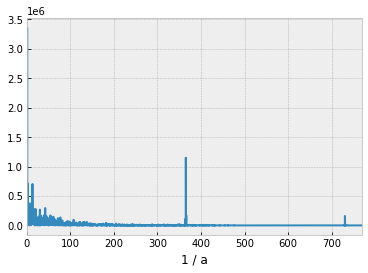

In [37]:
fft = abs(pd.Series(np.fft.rfft(de['wind'] - de['wind'].mean()),   # subtract mean!
                    index=np.fft.rfftfreq(len(de), d=1./8760))**2)
fft.plot()
plt.xlim(0, 768)
plt.xlabel('1 / a')

Text(0.5, 0, '1 / a')

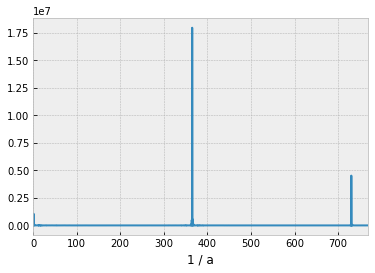

In [38]:
fft = abs(pd.Series(np.fft.rfft(de['solar'] - de['solar'].mean()),   # subtract mean!
                    index=np.fft.rfftfreq(len(de), d=1./8760))**2)
fft.plot()
plt.xlim(0, 768)
plt.xlabel('1 / a')

Text(0.5, 0, '1 / a')

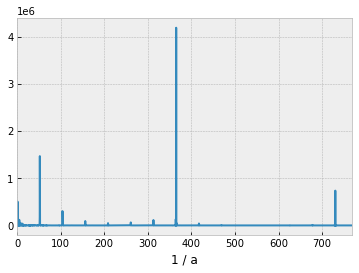

In [39]:
fft = abs(pd.Series(np.fft.rfft(de['load'] - de['load'].mean()),   # subtract mean!
                    index=np.fft.rfftfreq(len(de), d=1./8760))**2)
fft.plot()
plt.xlim(0, 768)
plt.xlabel('1 / a')

**Load:**

* The largest peak is 365 / a, i.e. once a day
* The second largest at 52 / a, i.e. once a week.
* There are also semi-daily patterns (e.g. morning and evening), cf. peak at 730 / a.
* Furthermore there are a few smaller peaks between daily and weekly patterns

**Solar:**

* The daily peak is very distinct.

**Wind:**

* Comparably more long-term patterns, cf interval < 100 / a.

***
**(h) Normalize the time series to one, so that $\langle{W}\rangle = \langle{S}\rangle = \langle{L}\rangle = 1$.**

**Now, for all three regions, plot the mismatch time series**
  
  $$\Delta(t) = \gamma \alpha W(t) + \gamma (1 - \alpha) S(t) - L(t) $$
  
**for the same winter and summer months as in (c). Choose** 
1. $\alpha \in \{0.0, 0.5, 0.75, 1.0\}$ with $\gamma = 1$, and 
2. $\gamma \in \{0.5, 0.75, 1.0, 1.25, 1.5\}$ with $\alpha = 0.75$.

**What is the interpretation of $\gamma$ and $\alpha$?**

**Which configuration entails the lowest mismatch on average and in extremes?**

Choose the country and alpha, gamma values and re-run:

* `d` could be `de`, `gb`, `eu`.

In [40]:
d = de
gamma = 1.0
alpha = 0

Normalize the time series and calculate mismatch time series:

In [41]:
d = d / d.mean()
m = gamma * alpha * d['wind'] + gamma * (1-alpha) * d['solar'] - d['load']

Plot the mismatch time series for the winter and summer months:

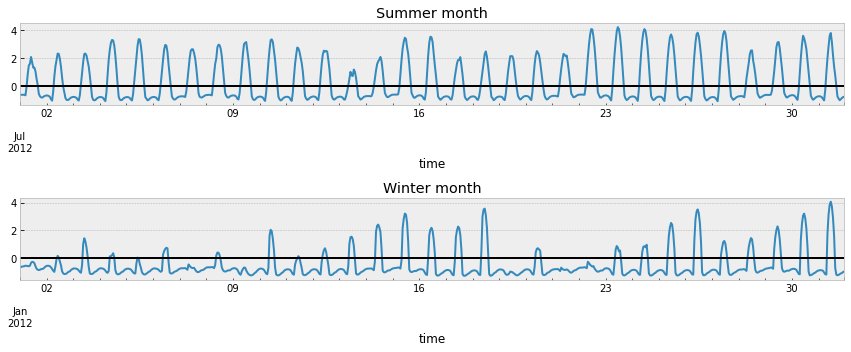

In [42]:
fig, axes = plt.subplots(2, 1, figsize=(12, 5))
m.loc["2012-07"].plot(ax=axes[0])
axes[0].set_title("Summer month")
m.loc["2012-01"].plot(ax=axes[1])
axes[1].set_title("Winter month")
for ax in axes:
    ax.axhline(0., color='k')
fig.tight_layout()

What is the interpretation of $\gamma$ and $\alpha$?
* `gamma=1` means that on average generation equals load.
* `gamma>1` means that more electricity is produced than consumed.
* `gamma<1` means that less electricity is produced than consumed.
* `alpha` defines the share between wind and solar.

***
**(i) For all three regions, repeat (b)-(g) for the mismatch time series. What changed?**

**Statistics**

In [43]:
m.describe()

count    3.506400e+04
mean     8.948656e-16
std      1.420505e+00
min     -1.426585e+00
25%     -9.253843e-01
50%     -7.468402e-01
75%      6.957514e-01
max      5.102248e+00
dtype: float64

In [44]:
m.var()

2.017834844135133

**Time series plot**

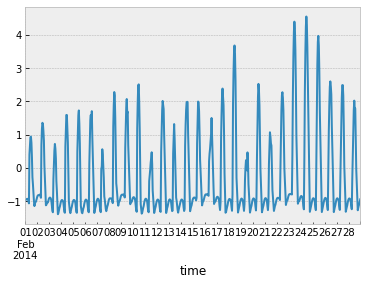

In [45]:
m.loc["2014-2"].plot()

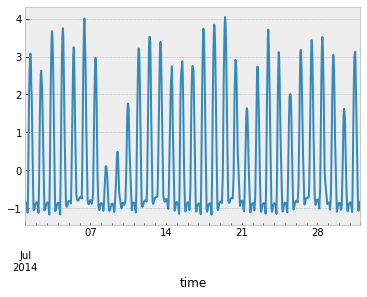

In [46]:
m.loc["2014-7"].plot()

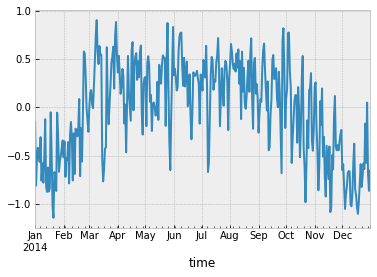

In [47]:
m.loc["2014"].resample("D").mean().plot()

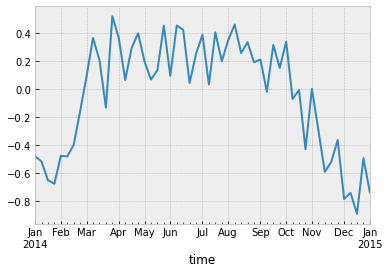

In [48]:
m.loc["2014"].resample("W").mean().plot()

**Duration curve**

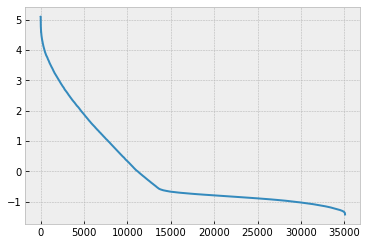

In [49]:
m.sort_values(ascending=False).reset_index(drop=True).plot()

**Probability density function**

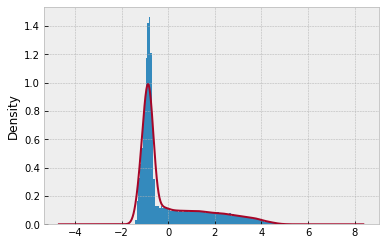

In [50]:
# 1)
m.plot.hist(bins=100, density=True)

# 2)
m.plot.density()

**Fast Fourier Transform**

Text(0.5, 0, '1 / a')

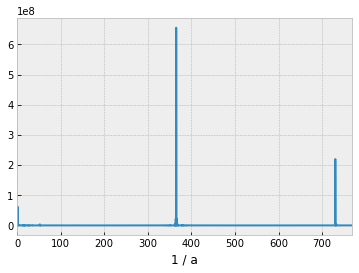

In [51]:
fft = abs(pd.Series(np.fft.rfft(m - m.mean()),   # Subtract mean
                    index=np.fft.rfftfreq(len(m), d=1./8760))**2)

fft.plot()
plt.xlim(0, 768)
plt.xlabel('1 / a')